![](http://cdn4.spiegel.de/images/image-983573-860_galleryfree-vuvs-983573.jpg)

True story: the first movie, that I ever saw in the cinema, was "[Titanic](https://en.wikipedia.org/wiki/Titanic_(1997_film)". So I was very happy when I found out, that a lot of Data Scientist starts with the titanic dataset. So I will also used it to learn more about data exploratory analysis and features extraction techniques. 


Short story about [me](https://www.linkedin.com/in/vladmelonari/): Early this year I started to learn python with the book "learn python the hard way". A few months ago I began to learn machine learning with different courses and tutorials, so this is my first kernel on a beginner-level.
I understood quickly, that if you want to predict something, you need to understand your data, so this Notebook is more about data exploration and of course machine learning.



Let's go trough the following steps:

**1. Exploratory Data Analysis (EDA)**
* Problem definition (what do we want to solve)
* Variable Identification (what data do we have)
* Univariate Analysis (understanding each field in the dataset)
* Multivariate Analysis (understanding the interactions between different fields and target)
* Missig values treatment (machine learning algorythems hates fields with missing data)
* Outlier treatment

**2. Feature Enginerring**
* Variable transformation
* Variable creation
* Dimesionality reduction

**3. Predictive Modeling**

Credits goes to [Sunil Ray](https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/) and many amazing Kagglers, that showed me why and how to go with a workflow for EDA.


Now get prepared, by sitting on you favorite chair in a room with a glas Wine or Cola, because this can be a long read.

# Problem definition

I think you already know something about Titanic. However, Titanic was as a British passenger liner that sank in the North Atlantic Ocean in the early hours of 15 April 1912, after colliding with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. ([Wikipedia](https://en.wikipedia.org/wiki/RMS_Titanic))

As we want to know who and dind't survived, we are dealing with a classification problem.

Before we go forward, we need to import the dataset

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

train_df = pd.read_csv("../titanic/Data/train.csv")
test_df = pd.read_csv("../titanic/Data/test.csv")
combine = [train_df, test_df]

# Variable identification

Let's see what information (variables) do we have in our dataset:

In [7]:
print("Variables:", train_df.columns)
train_df.head()

Variables: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


For data vizualisation and it is important, to note down, what kind of type of variables do we have here.

* **Nominal**: Survived, Sex, Embarked, SibSp, Parch
* **Ordinal**: Pclass
* **Numerical**: Age, Fare
* Other: Name, Ticket, Cabin

For more information, you can read this [here](https://towardsdatascience.com/data-types-in-statistics-347e152e8bee):

In [3]:
#lets see some statistic in our dataset.
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We have 891 observations in our training dataset and some missing data in the Age field.
Oh... also some outliers in the Age, Fare, SibSp and Parch table

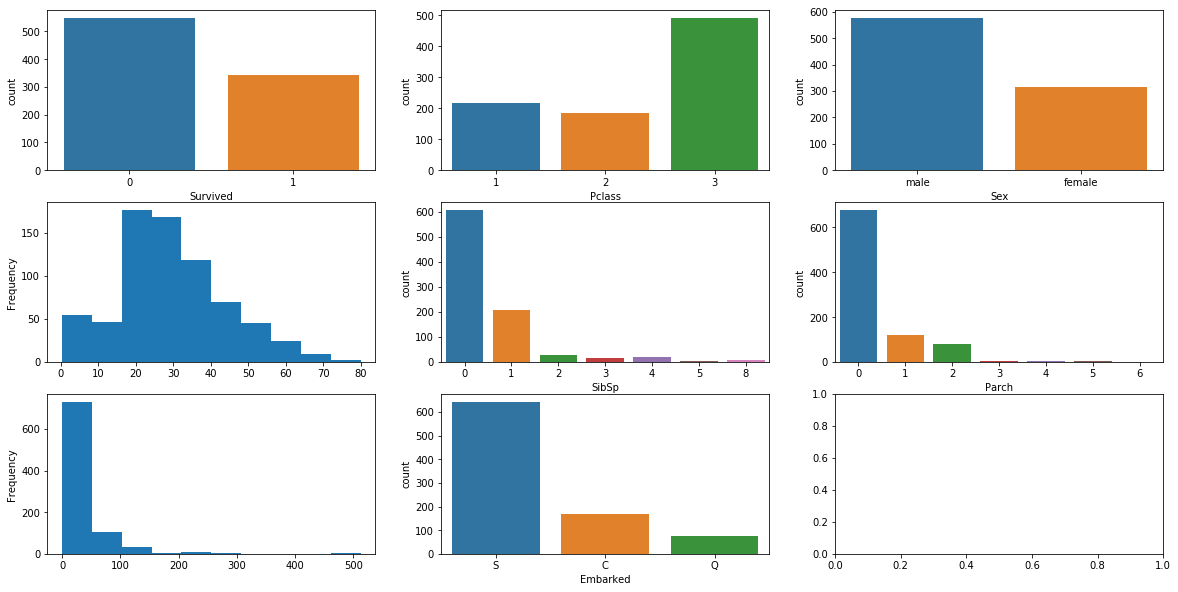

In [4]:
# graphics are better
f, ax = plt.subplots(3, 3, figsize = (20,10))

sns.countplot("Survived", data = train_df, ax = ax[0,0])
sns.countplot("Pclass", data = train_df, ax = ax[0,1])
sns.countplot("Sex", data = train_df, ax = ax[0,2])
train_df["Age"].plot.hist(x= "Age", ax = ax [1,0])
sns.countplot("SibSp", data = train_df, ax = ax[1,1])
sns.countplot("Parch", data = train_df, ax = ax[1,2])
train_df["Fare"].plot.hist(x="Fare", ax = ax [2,0])
sns.countplot("Embarked", data = train_df, ax = ax[2,1])

plt.show()

# Univariate Analysis

Lets start with the first independent variable. The passanager Class -> **Pclass**

How many people survived in each class: 
 Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119 

The survive-rate in each class: 
    Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


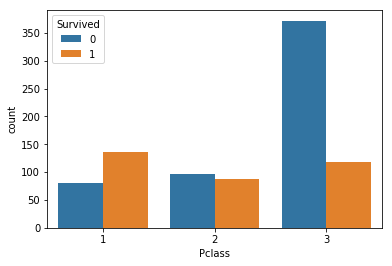

In [5]:
sns.countplot("Pclass", hue="Survived", data = train_df)

print("How many people survived in each class: \n", 
      pd.crosstab(train_df["Pclass"], train_df["Survived"]), "\n")

print("The survive-rate in each class: \n",
      train_df[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False))

Of course, there were way more passangiers in the third class. However, the passangiers in the first class, had a 62% chance to survive. 
This variable has a significant correlation to our target variable (survival)

**Sex** What about males vs females. 

In [6]:
# print("Here are no missing data and because the data is categorical there are also no outliers. NEXT!")
# train_df.Pclass.describe()

The survived rate of male vs female.
       Sex  Survived
0  female  0.742038
1    male  0.188908


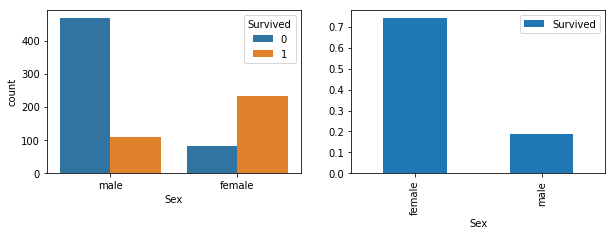

In [7]:
print("The survived rate of male vs female.\n",
      train_df[["Sex", "Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by="Survived", ascending=False))

f, ax = plt.subplots(1, 2, figsize =(10, 3))

sns.countplot("Sex", hue = "Survived", data = train_df, ax = ax[0])
train_df[["Sex", "Survived"]].groupby(["Sex"]).mean().plot.bar(ax = ax[1])
plt.show()

So, women had about 75% chances to survive. A great variable to predict our target. NEXT!

**Age** distribution. Let's see how this looks like

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


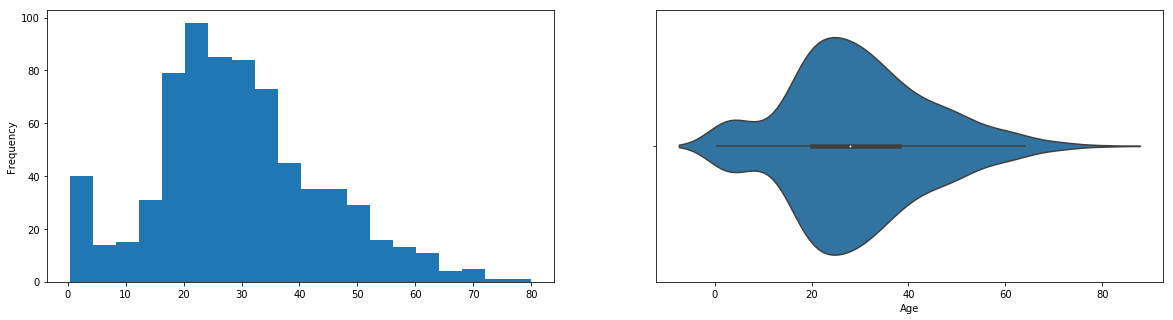

In [8]:
# Both graphics represents the same. The Age distribution
print(train_df.Age.describe())

f, ax = plt.subplots(1,2, figsize = (20,5))

train_df.Age.plot.hist(bins = 20, ax= ax[0])
sns.violinplot(train_df.Age, ax=ax[1])
plt.show()

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


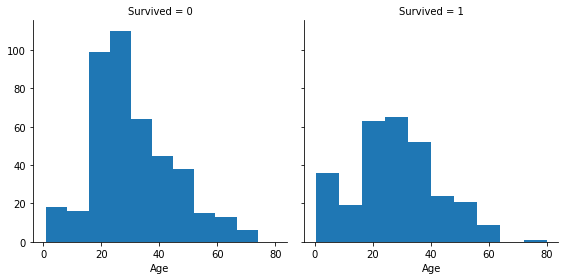

In [9]:
grid = sns.FacetGrid(train_df, col="Survived", size=4)
grid.map(plt.hist, "Age", bins = 10)
plt.show()

As we can see, the ages is also a good variable. Childres and a lot of passangers between 20 and 35 are saved. Also the olders on the ship is saved. 

In our data we have 177 Ages missing from the Data
And also some outliers. We have to clean this data later!


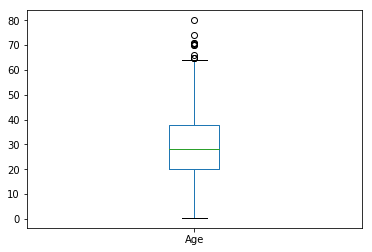

In [10]:
print("In our data we have", train_df.Survived.count() - train_df.Age.count(), "Ages missing from the Data")
print("And also some outliers. We have to clean this data later!")
train_df.Age.plot.box()

**SibSp** - the number of relatives on the boot.

Let's see what is the survived rate/avarage of number of people with relatives on Titanic 
    SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


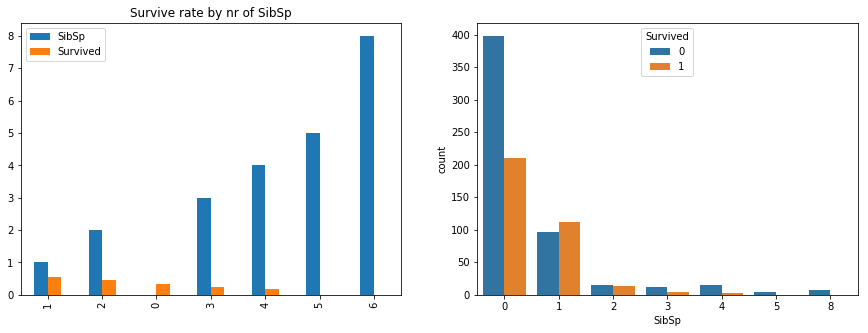

In [11]:
# train_df.SibSp.value_counts().plot.bar()
print("Let's see what is the survived rate/avarage of number of people with relatives on Titanic \n",
     train_df[["SibSp", "Survived"]].groupby(["SibSp"], as_index=False).mean().sort_values(by = "Survived", ascending = False))


f, ax = plt.subplots(1, 2, figsize = (15, 5))
sns.countplot("SibSp", hue = "Survived", data = train_df, ax = ax [1])
# ax[1].set_title("asad")

# train_df[["SibSp", "Survived"]].groupby(["SibSp"], as_index=False).count().sort_values(by = "Survived", ascending = False).plot.bar(ax = ax[1], title = "People survived by nr of SibSp")
train_df[["SibSp", "Survived"]].groupby(["SibSp"], as_index=False).mean().sort_values(by = "Survived", ascending = False).plot.bar(ax = ax[0], title = "Survive rate by nr of SibSp")

So, of course the majority of the passangers without relatives on Titanic survived. But the chances were higher to survive, if you had childers or other family members.

In [12]:
print("We have", train_df.SibSp.count(), "Observation in our Dataset, so no missing Data, \n but maybe we shoud simplify this variable. Later")

We have 891 Observation in our Dataset, so no missing Data, 
 but maybe we shoud simplify this variable. Later


**Parch** What about the number of parents with children

Lets see how the Survived-rate in each Parch category is distributed: 
    Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000


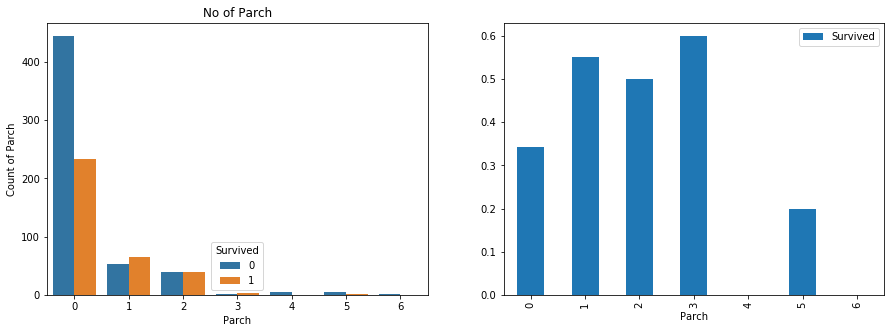

In [13]:
print("Lets see how the Survived-rate in each Parch category is distributed: \n",
      train_df[["Parch", "Survived"]].groupby(["Parch"], as_index = False).mean().sort_values(by = "Survived", ascending = False))

f, ax = plt.subplots(1, 2, figsize = (15, 5))

train_df[["Parch", "Survived"]].groupby(["Parch"]).mean().plot.bar(ax = ax[1])
sns.countplot("Parch", hue = "Survived", data = train_df, ax = ax[0])

ax[0].set_title("No of Parch")
ax[0].set_xlabel("Parch")
ax[0].set_ylabel("Count of Parch")

plt.show()


The majaroty on Titanic and which also survived were single. But if they had 1-3 Childrens, the chances to survive were more than 50%.  
We need to add SibSp and Parch to one "Family" variable.

In [14]:
print("We dont have any missing data here and now outliers")
print(train_df.Parch.count(), "total obserivation in the database")

We dont have any missing data here and now outliers
891 total obserivation in the database


**Fare** - Let's go ahead with the ticket prices.

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


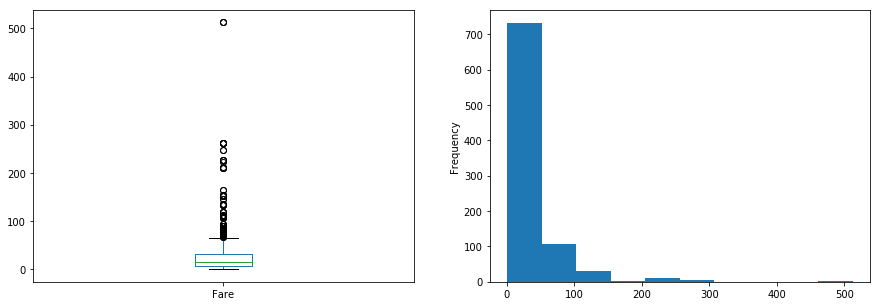

In [15]:
print(train_df.Fare.describe())

f, ax = plt.subplots(1, 2, figsize=(15,5))

train_df.Fare.plot.box(ax =ax[0])
train_df.Fare.plot.hist(bins = 10 , ax = ax[1])

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


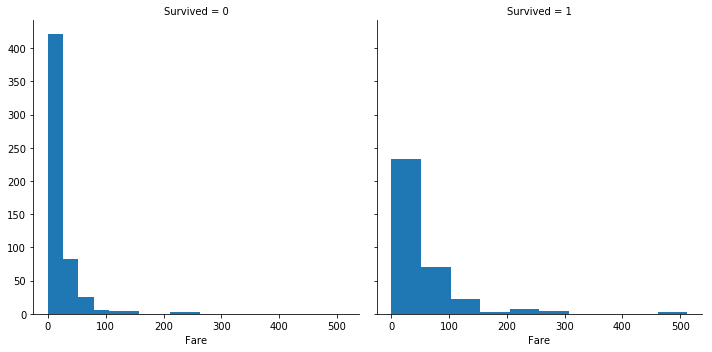

In [16]:
grid = sns.FacetGrid(train_df, col = "Survived", size = 5)
grid.map(plt.hist, "Fare", bins = 10)

plt.show()

Yeah, so, most of the passangers paid arround 32 Dollars. and most of them survived. I cant see no correlations from this single information, so we need to treat this in the multivariatea analysis.

I am just curious. Who paid more. Women or men?


/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


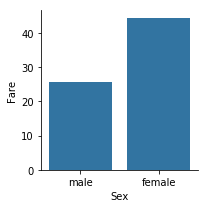

In [17]:
print("I am just curious. Who paid more. Women or men?")

grid = sns.FacetGrid(train_df,  size = 3)
grid.map(sns.barplot, "Sex", "Fare", ci=None)

We dont have any missing data here -> 891
We have some outliers at the first sight


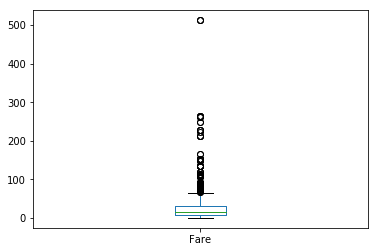

In [18]:
print("We dont have any missing data here ->", train_df.Fare.count())
print("We have some outliers at the first sight")

train_df.Fare.plot.box()
plt.show()

**Embarked** - the last one.

 Missing Data: 2
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957


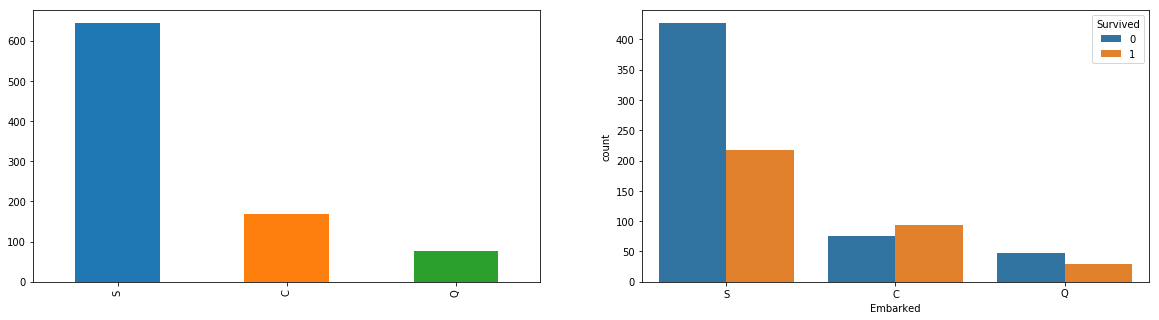

In [19]:
print(" Missing Data:", train_df.Survived.count() - train_df.Embarked.count())

print(train_df[["Embarked", "Survived"]].groupby(["Embarked"], as_index = False).mean().sort_values(by = "Survived", ascending = False))

f, ax = plt.subplots(1, 2, figsize = (20, 5))

train_df.Embarked.value_counts().plot.bar(ax = ax[0])
sns.countplot("Embarked", hue="Survived", data = train_df, ax = ax[1])
plt.show()

Yeah. In Southampton came more on board, 644 Passangers from over 800. The chances were about 55 % to survive, if the passangers embarked in Cherbourg.
We also have 2 missing data

# Missing Values Treatment

First I want to get rid of some variables. "Cabin" and "Tickets seems to not have any impact on the outcome. Cabin has to many missing values and tickts seems to be a random number. 

In [20]:
print("Before we remove we have", train_df.shape, "in Train Set and", test_df.shape, "in Test Set")

train_df = train_df.drop(["Cabin", "Ticket"], axis = 1)
test_df = test_df.drop(["Cabin", "Ticket"], axis = 1)
combine = [train_df, test_df]

print("Now we should have", train_df.shape, "in Train set and,", test_df.shape, "in Test Set")

Before we remove we have (891, 12) in Train Set and (418, 11) in Test Set
Now we should have (891, 10) in Train set and, (418, 9) in Test Set


**Missing Age** Now lets go ahead with the missing Ages. We will take them from the title Names.

In [21]:
for dataset in combine:
    dataset["Title"] = dataset.Name.str.extract(" ([A-Za-z]+)\.", expand = False)

pd.crosstab(train_df["Title"], train_df["Sex"]).T

Title,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [22]:
pd.crosstab(test_df["Title"], train_df["Sex"]).T

Title,Col,Dona,Dr,Master,Miss,Mr,Mrs,Ms,Rev
Sex,,,,,,,,,
female,0,0,1,6,26,95,31,1,0
male,2,1,0,15,52,145,41,0,2


In [23]:
train_df[["Title", "Age"]].groupby(["Title"]).mean()

,Age
Title,
Capt,70.000000
Col,58.000000
Countess,33.000000
Don,40.000000
Dr,42.000000
Jonkheer,38.000000
Lady,48.000000
Major,48.500000
Master,4.574167


In [24]:
for dataset in combine:
    dataset["Title"] = dataset["Title"].replace("Dona", "Other")
    dataset["Title"] = dataset["Title"].replace("Mlle", "Miss")
    dataset["Title"] = dataset["Title"].replace("Mme", "Miss")
    dataset["Title"] = dataset["Title"].replace("Ms", "Miss")
    dataset["Title"] = dataset["Title"].replace("Capt", "Mr")
    dataset["Title"] = dataset["Title"].replace("Col", "Mr")
    dataset["Title"] = dataset["Title"].replace("Countess", "Mrs")
    dataset["Title"] = dataset["Title"].replace("Don", "Mr")
    dataset["Title"] = dataset["Title"].replace("Dr", "Mr")
    dataset["Title"] = dataset["Title"].replace("Jonkheer", "Other")
    dataset["Title"] = dataset["Title"].replace("Lady", "Mrs")
    dataset["Title"] = dataset["Title"].replace("Major", "Mr")
    dataset["Title"] = dataset["Title"].replace("Rev", "Other")
    dataset["Title"] = dataset["Title"].replace("Sir", "Mr")

train_df[["Title", "Age"]].groupby(["Title"]).mean()
# train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()


,Age
Title,
Master,4.574167
Miss,21.860000
Mr,32.862530
Mrs,35.981818
Other,42.428571


In [25]:
for dataset in combine:
    dataset.loc[(dataset.Age.isnull()) & (dataset.Title == "Mr"), "Age"] = 32
    dataset.loc[(dataset.Age.isnull()) & (dataset.Title == "Master"), "Age"] = 4
    dataset.loc[(dataset.Age.isnull()) & (dataset.Title == "Miss"), "Age"] = 22
    dataset.loc[(dataset.Age.isnull()) & (dataset.Title == "Mrs"), "Age"] = 36
    dataset.loc[(dataset.Age.isnull()) & (dataset.Title == "Other"), "Age"] = 42
    
print("Age missing values after we matched the missing values from the Name Title is:",
      train_df.Age.isnull().sum())

Age missing values after we matched the missing values from the Name Title is: 0


**Fare** - In the train data, we dont have any missing values. But in the test set, we do. So lets just replace the line with the median value.

In [26]:
print(test_df.info())
print("-"*40)

test_df["Fare"].fillna(test_df["Fare"].dropna().median(), inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Embarked       418 non-null object
Title          418 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 32.7+ KB
None
----------------------------------------


In [27]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Embarked       418 non-null object
Title          418 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 32.7+ KB


** Embarked** - has two missing values. We now the most passangers came from southampt, so why not add those two missing data to "S"?

In [28]:
train_df.Embarked.fillna("S", inplace = True)
train_df.Embarked.isnull().sum()

0

In [29]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


# Outlier Treatment

An outlier is an observation point that is distant from other observations. An outlier may be due to variability in the measurement or it may indicate experimental error; the latter are sometimes excluded from the data set. reference https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/
Methods of detecting Outlier -> Refer for more details http://colingorrie.github.io/outlier-detection.html

* Z-score method
* Modified Z-score method
* IQR method -- I will use this method.

IQR Method meens that any data points outside 1.5 time the IQR (1.5 time IQR below Q1, or 1.5 time IQR above Q3), is considered an outlier.
The interquartile range (IQR) is a measure of statistical dispersion, being equal to the difference between the 75th and 25th percentiles, or between upper and lower quartiles.

So, I found some outliers in Age, SibSp, Parch and Fare. Lets go ahead

In [30]:
# Outlier detection 
from collections import Counter
#Once initialized, counters are accessed just like dictionaries.
#Also, it does not raise the KeyValue error (if key is not present) instead the value’s count is shown as 0.
def detect_outliers(df,n,features):
    outlier_indices = []
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col],25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index       
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    return multiple_outliers   
# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(train_df,2,["Age","SibSp","Parch","Fare"])
train_df.loc[Outliers_to_drop] # Show the outliers rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.00,0,1,153.4625,S,Mrs
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,151.5500,S,Master
438,439,0,1,"Fortune, Mr. Mark",male,64.00,1,4,263.0000,S,Mr
587,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.00,1,1,79.2000,C,Mr
659,660,0,1,"Newell, Mr. Arthur Webster",male,58.00,0,2,113.2750,C,Mr
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.00,1,1,71.0000,S,Mr
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,263.0000,S,Mr
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.00,3,2,263.0000,S,Miss
159,160,0,3,"Sage, Master. Thomas Henry",male,4.00,8,2,69.5500,S,Master
180,181,0,3,"Sage, Miss. Constance Gladys",female,22.00,8,2,69.5500,S,Miss


In [31]:
# lets delete this outliers
train_df = train_df.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

# 2. Feature Enginerring
* Variable transformation
* Variable creation
* Dimesionality reduction

**Age_groups ** - Lets crate a new variable, where the ages are splitet into groups. Machine learning love this and hates to work with continous data

In [32]:
print("So if the oldest Age was 80. We just devide this into 5 groups ->",80/5 )

combine = [train_df, test_df]

for dataset in combine:
    dataset.loc[dataset["Age"] <= 16, "Age_group"] = 0
    dataset.loc[(dataset["Age"] > 16) & (dataset["Age"] <=32), "Age_group"] = 1
    dataset.loc[(dataset["Age"] > 32) & (dataset["Age"] <=48), "Age_group"] = 2
    dataset.loc[(dataset["Age"] > 48) & (dataset["Age"] <=64), "Age_group"] = 3
    dataset.loc[(dataset["Age"] > 64), "Age_group"] = 4

train_df.head()

So if the oldest Age was 80. We just devide this into 5 groups -> 16.0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr,2.0


How many passangers are in the age_groups each:
 1.0    493
2.0    205
0.0    102
3.0     65
4.0     10
Name: Age_group, dtype: int64


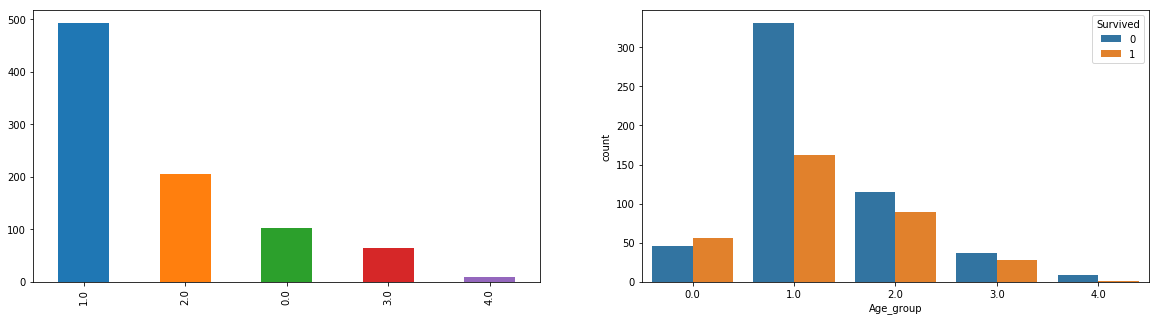

In [33]:
# train_df[["Age_group", "Survived"]].groupby(["Age_group"]).mean().sort_values(by = "Survived")
print("How many passangers are in the age_groups each:\n",
      train_df.Age_group.value_counts(ascending = False))

f, ax = plt.subplots(1,2, figsize = (20,5))
train_df.Age_group.value_counts().plot.bar( ax = ax [0])
sns.countplot("Age_group", hue = "Survived", data = train_df, ax = ax[1])


**Fare_range ** - As the Fare variable is also continous, we need to bring it into groups, to make an ordinal variable.. just like age_groups.
We will use pandas qcut for this. So what qcut does is it splits or arranges the values according the number of bins we have passed. 
So if we pass for 5 bins, it will arrange the values equally spaced into 5 seperate bins or value ranges.

In [34]:
train_df['Fare_range'] = pd.qcut(train_df['Fare'], 4)

train_df[["Fare_range", "Survived"]].groupby(["Fare_range"], as_index = False).mean().sort_values(by = "Fare_range", ascending = True)

,Fare_range,Survived
0,"(-0.001, 7.896]",0.197309
1,"(7.896, 14.108]",0.311628
2,"(14.108, 30.0]",0.433790
3,"(30.0, 512.329]",0.600917


/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


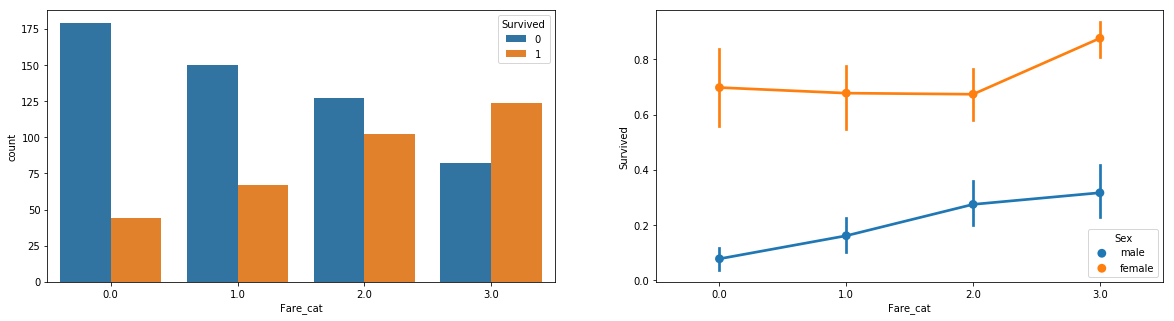

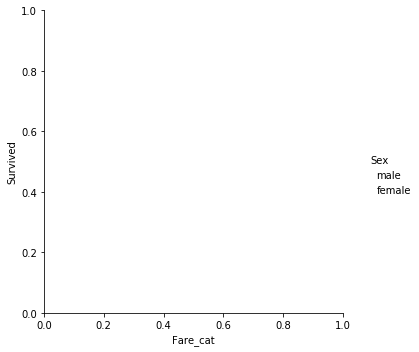

In [35]:
#Now we can create the fare categories with the the values above.
    
for dataset in combine:
    dataset.loc[(dataset["Fare"] <= 7.91), "Fare_cat"] = 0
    dataset.loc[(dataset["Fare"] > 7.91) & (dataset["Fare"] <= 14.454), "Fare_cat"] = 1
    dataset.loc[(dataset["Fare"] > 14.454) & (dataset["Fare"] <= 31), "Fare_cat"] = 2
    dataset.loc[(dataset["Fare"] > 31), "Fare_cat"] = 3
    
f, ax = plt.subplots(1, 2, figsize = (20, 5))
sns.countplot("Fare_cat", hue = "Survived", data = train_df, ax = ax[0])
sns.factorplot("Fare_cat", "Survived", hue = "Sex", data = train_df, ax = ax [1])
plt.show()

** Family size vs Single** - lets create a new variable. 

In [36]:
# lets make from sibsp and parch family sets and a new variable of is_single

for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age_group,Fare_range,Fare_cat,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr,1.0,"(-0.001, 7.896]",0.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs,2.0,"(30.0, 512.329]",3.0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss,1.0,"(7.896, 14.108]",1.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs,2.0,"(30.0, 512.329]",3.0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr,2.0,"(7.896, 14.108]",1.0,1


        Survived
Single          
0       0.514793
1       0.303538


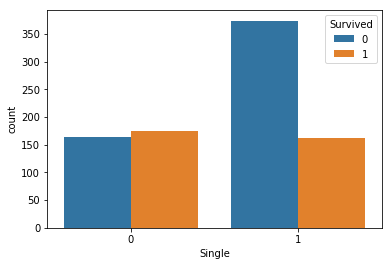

In [37]:
# Now we have the family size. 1 is alone and above 1 is with family

for dataset in combine:
    dataset["Single"] = 0
    dataset.loc[dataset["FamilySize"] == 1, "Single"] = 1

print(train_df[["Single", "Survived"]].groupby(["Single"]).mean())    

sns.countplot("Single", hue = "Survived", data = train_df)

**We are done with cleaning the data** and creating new variables. 
Lets drop the columns we dont need anymore, like... PassengerID, Name, Age, SibSp, Parch, Fare, Family Size, etc ")


In [38]:
train_df = train_df.drop(["PassengerId", "Name", "Age", "SibSp", "Parch", "Fare", "Fare_range", "FamilySize"], axis = 1)
test_df = test_df.drop(["Name", "Age", "SibSp", "Parch", "Fare", "FamilySize"], axis = 1)
combine = [train_df, test_df]

# Multivariate Analysis

Now lets see if we can find some corelations between data.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


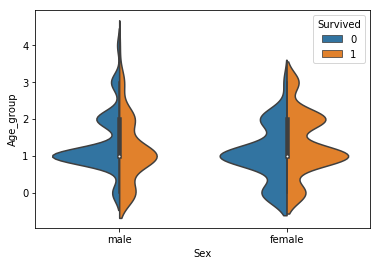

In [39]:
sns.violinplot("Sex","Age_group", hue="Survived", data=train_df, split=True)

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


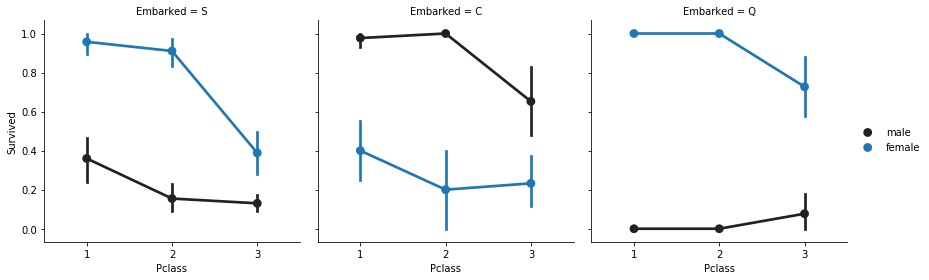

In [40]:
grid = sns.FacetGrid(train_df, col = "Embarked", size = 4)
grid.map(sns.pointplot, "Pclass", "Survived", "Sex")
grid.add_legend()

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


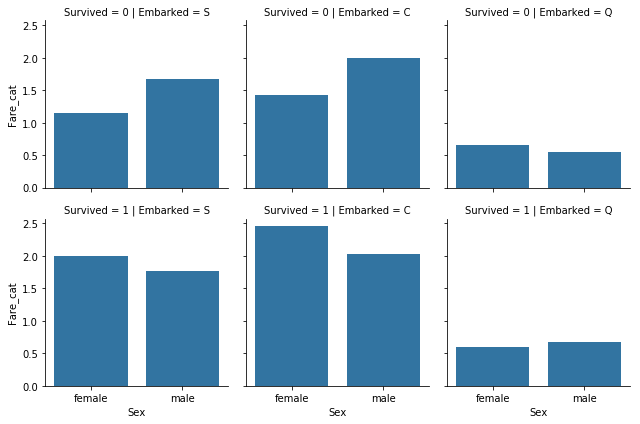

In [41]:
grid = sns.FacetGrid(train_df, col = "Embarked", row = "Survived", size = 3)
grid.map(sns.barplot, "Sex", "Fare_cat", ci=None)

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


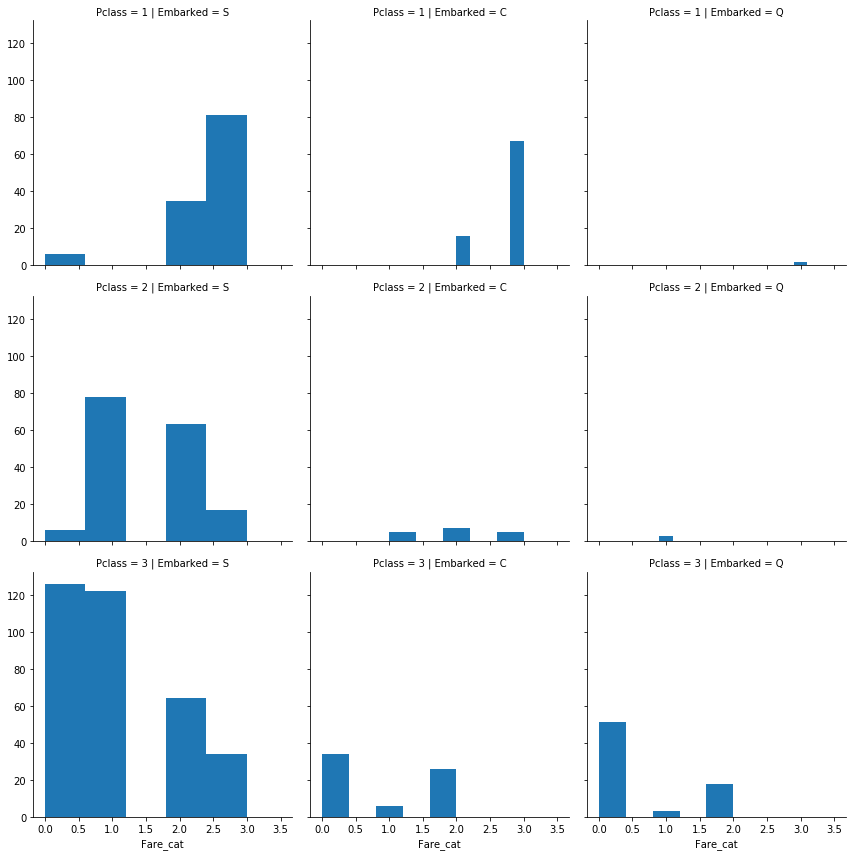

In [42]:
grid = sns.FacetGrid(train_df, col = "Embarked", row = "Pclass", size = 4)
grid.map(plt.hist, "Fare_cat", bins = 5)

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


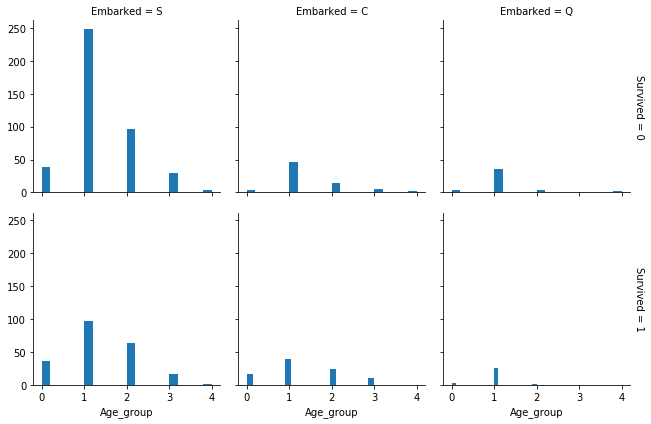

In [43]:
grid = sns.FacetGrid(train_df, col ="Embarked", row = "Survived", size = 3, margin_titles = "xx")
grid.map(plt.hist, "Age_group",  bins=20)

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


,Pclass,Age_group,Survived,Fare_cat
0,1,1.782609,0.632850,2.666667
1,2,1.369565,0.472826,1.586957
2,3,1.068182,0.245868,0.927686


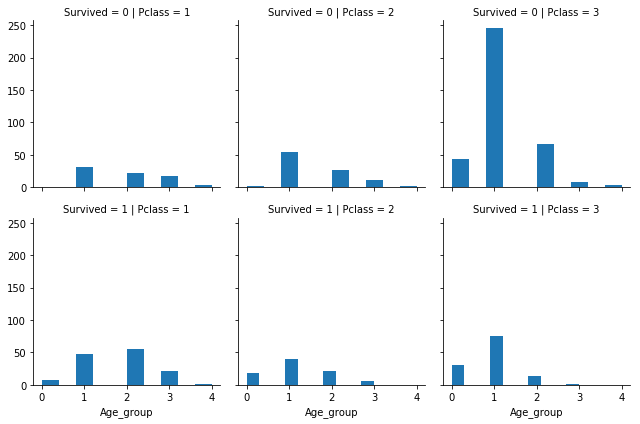

In [44]:
grid = sns.FacetGrid(train_df, row = "Survived", col = "Pclass", size = 3)
grid.map(plt.hist, "Age_group")

train_df[["Age_group", "Survived", "Pclass", "Fare_cat"]].groupby(["Pclass"], as_index = False).mean().sort_values(by = "Age_group", ascending = False)

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


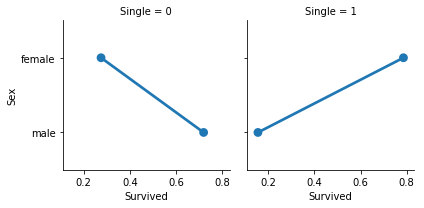

In [45]:
grid = sns.FacetGrid(train_df, col = "Single", size = 3)
grid.map(sns.pointplot, "Survived", "Sex", ci = None)

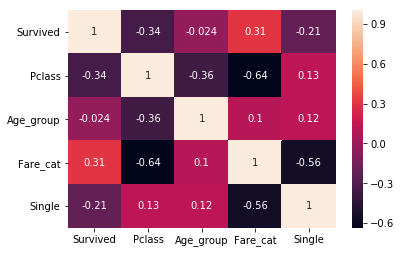

In [46]:
# g = (train_df.loc[: , ["Survived", "Pclass"]]).corr()
# sns.heatmap(train_df.corr())
sns.heatmap(train_df.corr(),annot=True)

In [47]:
test_df.head()

,PassengerId,Pclass,Sex,Embarked,Title,Age_group,Fare_cat,Single
0,892,3,male,Q,Mr,2.0,0.0,1
1,893,3,female,S,Mrs,2.0,0.0,0
2,894,2,male,Q,Mr,3.0,1.0,1
3,895,3,male,S,Mr,1.0,1.0,1
4,896,3,female,S,Mrs,1.0,1.0,0


In [48]:
train_df.head()

,Survived,Pclass,Sex,Embarked,Title,Age_group,Fare_cat,Single
0,0,3,male,S,Mr,1.0,0.0,0
1,1,1,female,C,Mrs,2.0,3.0,0
2,1,3,female,S,Miss,1.0,1.0,1
3,1,1,female,S,Mrs,2.0,3.0,0
4,0,3,male,S,Mr,2.0,1.0,1


# Data preparation
Now lets convert Sex, Embarked and Title into numbers, so the machine can understand and predict them

In [49]:
for dataset in combine:
    dataset["Sex"].replace(["male", "female"], [0, 1], inplace = True)
    dataset["Embarked"].replace(["S", "C", "Q"], [0, 1, 2], inplace = True)
    dataset["Title"].replace(["Master", "Miss", "Mr", "Mrs", "Other"], [0, 1, 2, 3, 4], inplace = True)

train_df.head()

,Survived,Pclass,Sex,Embarked,Title,Age_group,Fare_cat,Single
0,0,3,0,0,2,1.0,0.0,0
1,1,1,1,1,3,2.0,3.0,0
2,1,3,1,0,1,1.0,1.0,1
3,1,1,1,0,3,2.0,3.0,0
4,0,3,0,0,2,2.0,1.0,1


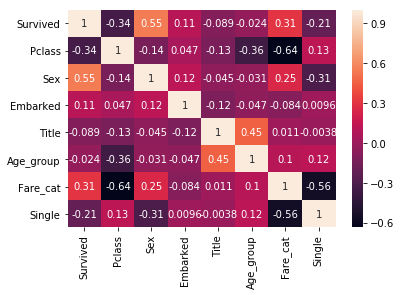

In [50]:
#Lets see the correlation diagriam

sns.heatmap(train_df.corr(), annot = True)
plt.show()

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/opt/conda/lib/python3.6/site-packages/

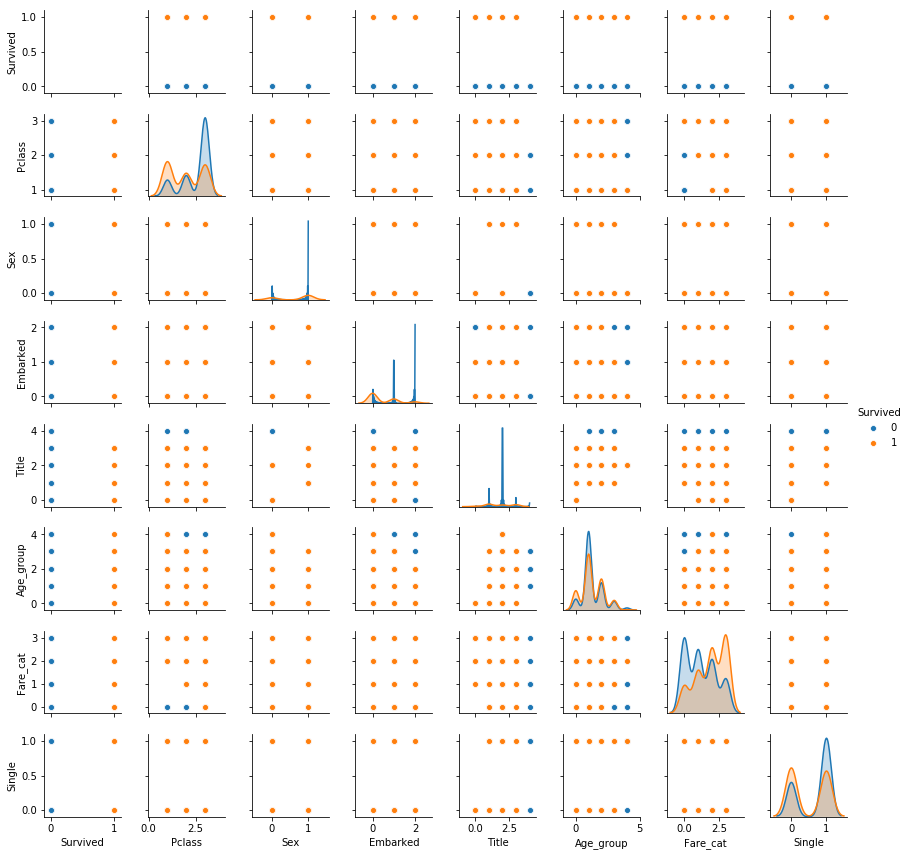

In [51]:
#Another one correlation map, which I find it ugly

sns.pairplot(train_df, hue="Survived", size=1.5)
plt.show()

# Yeah. We are done with EDA 
exploring and analysing the data. Lets start with machine learning, finaly.

First I had to unrderstood that we are dealing here with a classification problem. I also learned that this type of problem could be also a regression problem. We just want to know with all the variables who surived and not. We will train our machine with supervised learning algorythem, as we are giving our model input. So, with these understanding -> Supervised Learning + Classification and Regression, we can go with the following algorythem:
* Logistic Regression
* K-Nearest Neighbors
* Support Vector Machines
* Decision Tree
* Random Forest
* Perceptron (never used it)
* Artificial neural network (never used it)
* Relevance Vector Machine (never used it) 

In [52]:
print("Lets import what we need")

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.model_selection import cross_val_predict

Lets import what we need


In [53]:
test_df.head()

,PassengerId,Pclass,Sex,Embarked,Title,Age_group,Fare_cat,Single
0,892,3,0,2,2,2.0,0.0,1
1,893,3,1,0,3,2.0,0.0,0
2,894,2,0,2,2,3.0,1.0,1
3,895,3,0,0,2,1.0,1.0,1
4,896,3,1,0,3,1.0,1.0,0


In [54]:
X_train = train_df.drop("Survived", axis = 1)
Y_train = train_df["Survived"]
X_test = test_df.drop("PassengerId", axis = 1).copy()

X_train.shape, Y_train.shape, X_test.shape

((875, 7), (875,), (418, 7))

In [55]:
# Logistic Regression
# Logistic Regression is a useful model to run early in the workflow. 
# Logistic regression measures the relationship between the categorical dependent variable (feature) and 
# one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution.

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print("The accuracy of Logistic Regression is:", acc_log)

The accuracy of Logistic Regression is: 78.51


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [56]:
#lets check the coefficient. As higher the coefficient variable is, as higher the probality of the output
coeff_df = pd.DataFrame(train_df.columns.delete(0)) #remove the survival variable
coeff_df.columns = ["Features"] # create a new column
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by = "Correlation", ascending = False)

,Features,Correlation
1,Sex,2.505193
2,Embarked,0.260797
5,Fare_cat,0.091390
6,Single,0.006286
3,Title,-0.210160
4,Age_group,-0.315089
0,Pclass,-0.998243


In [57]:
# Support Vector Machine (SVM)
# Support Vector Machines which are supervised learning models with associated learning algorithms 
# that analyze data used for classification and regression analysis. 
# Given a set of training samples, each marked as belonging to one or the other of two categories, 
# an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier.

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
print("The accuracy of SVM is:", acc_svc)

The accuracy of SVM is: 82.17


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [58]:
# KNN
# In pattern recognition, the k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method used for classification and regression. 
# A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors 
# (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor. 

knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print("The accuracy with KNN is:", acc_knn)

The accuracy with KNN is: 84.34


In [59]:
# lets find the best neighbor nr.

for n in range (1, 20, 2):
    knn = KNeighborsClassifier (n_neighbors = n)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
    print("The accuracy with", n, "neihbors is:", acc_knn)

The accuracy with 1 neihbors is: 78.63
The accuracy with 3 neihbors is: 82.97
The accuracy with 5 neihbors is: 82.51
The accuracy with 7 neihbors is: 84.34
The accuracy with 9 neihbors is: 83.43
The accuracy with 11 neihbors is: 82.63
The accuracy with 13 neihbors is: 82.06
The accuracy with 15 neihbors is: 81.26
The accuracy with 17 neihbors is: 82.29
The accuracy with 19 neihbors is: 81.49


In [60]:
# Gaussian Naive Bayes
# In machine learning, naive Bayes classifiers are a family of simple probabilistic classifiers 
# based on applying Bayes' theorem with strong (naive) independence assumptions between the features. 
# Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem.

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
print("The accuracy with Gaussian Naive Bayes is", acc_gaussian)

The accuracy with Gaussian Naive Bayes is 77.71


In [61]:
# Perceptron 
# The perceptron is an algorithm for supervised learning of binary classifiers 
# (functions that can decide whether an input, represented by a vector of numbers, belongs to some specific class or not). 
# It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor 
# function combining a set of weights with the feature vector. The algorithm allows for online learning, in that it processes elements in the training set one at a time.

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
print("The Accuracy with Perceptron is:", acc_perceptron)

The Accuracy with Perceptron is: 74.97


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [62]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
print("The accuracy of Linear SVC is:", acc_linear_svc)

The accuracy of Linear SVC is: 79.31


In [63]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
print("The Accuracy of SGD is:", acc_sgd)

The Accuracy of SGD is: 63.66


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [64]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) *100, 2)
print("The accuracy of Decision Tree is", acc_decision_tree)

The accuracy of Decision Tree is 86.51


In [65]:
# Random Forest
# The next model Random Forests is one of the most popular. 
# Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, 
# that operate by constructing a multitude of decision trees (n_estimators=100) at training time and outputting the class 
# that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print("The accuracy of random forest ist:", acc_random_forest)


The accuracy of random forest ist: 86.51


In [66]:
print("now lets see the scores togher")

models = pd.DataFrame({
    "Model": ["Support Vector Machine", "KNN", "Logistic Regression", "Random Forest", "Naive Bayes", "Perceptron", "Stochastic Gradiant Decent", "Linear SVC", "Decision Tree"],
    "Score": [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_perceptron, acc_sgd, acc_linear_svc, acc_decision_tree]
})

models.sort_values(by = "Score", ascending = False)

now lets see the scores togher


,Model,Score
3,Random Forest,86.51
8,Decision Tree,86.51
0,Support Vector Machine,82.17
1,KNN,81.49
7,Linear SVC,79.31
2,Logistic Regression,78.51
4,Naive Bayes,77.71
5,Perceptron,74.97
6,Stochastic Gradiant Decent,63.66


In [ ]:
print("""Now lets see a confusion Matrix, which give a summary of the predictions made. Great for classification problem (1 vs 0)
The number of correct and incorrect predictions are counted and broken down by each class.
""")

# Y_pred = cross_val_predict(RandomForestClassifier(n_estimators = 100), X, Y, cv = 10)
# sns.heatmap(confusion_matrix(Y, Y_pred))

f,ax=plt.subplots(2,4,figsize=(20,10))

Y_pred = cross_val_predict(SVC(gamma = "auto"), X_train, Y_train, cv = 10)
sns.heatmap(confusion_matrix(Y_train, Y_pred), ax=ax[0,0], annot=True, fmt='2.0f')
ax[0,0].set_title('Matrix for SVM')

Y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors = 7), X_train, Y_train, cv = 10)
sns.heatmap(confusion_matrix(Y_train, Y_pred), ax=ax[0,1], annot=True, fmt='2.0f')
ax[0,1].set_title('Matrix for KNN')

Y_pred = cross_val_predict(GaussianNB(), X_train, Y_train, cv = 10)
sns.heatmap(confusion_matrix(Y_train, Y_pred), ax=ax[0,2], annot=True, fmt='2.0f')
ax[0,2].set_title('Matrix for Naive Bayes')

Y_pred = cross_val_predict(Perceptron(), X_train, Y_train, cv = 10)
sns.heatmap(confusion_matrix(Y_train, Y_pred), ax=ax[0,3], annot=True, fmt='2.0f')
ax[0,3].set_title('Matrix for Perceptron')

Y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100), X_train, Y_train, cv = 10)
sns.heatmap(confusion_matrix(Y_train, Y_pred), ax=ax[1,0], annot=True, fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')

Y_pred = cross_val_predict(LinearSVC(), X_train, Y_train, cv = 10)
sns.heatmap(confusion_matrix(Y_train, Y_pred), ax=ax[1,1], annot=True, fmt='2.0f')
ax[1,1].set_title('Matrix for Linear SVC')

Y_pred = cross_val_predict(SGDClassifier(), X_train, Y_train, cv = 10)
sns.heatmap(confusion_matrix(Y_train, Y_pred), ax=ax[1,2], annot=True, fmt='2.0f')
ax[1,2].set_title('Matrix for SGDClassifier')

Y_pred = cross_val_predict(DecisionTreeClassifier(), X_train, Y_train, cv = 10)
sns.heatmap(confusion_matrix(Y_train, Y_pred), ax=ax[1,3], annot=True, fmt='2.0f')
ax[1,3].set_title('Matrix for DecisionTreeClassifier')

plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

Now lets see a confusion Matrix, which give a summary of the predictions made. Great for classification problem (1 vs 0)
The number of correct and incorrect predictions are counted and broken down by each class.



/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If to

In [8]:
print("""
Lets take the last matrix:
493 -> correct nr. of predictions for Dead
236 -> correct nr. of prediction for Survived
56 -> Wrongly classified 56 as survived 
106 -> Wrong classified as dead 
""")


Lets take the last matrix:
493 -> correct nr. of predictions for Dead
236 -> correct nr. of prediction for Survived
56 -> Wrongly classified 56 as survived 
106 -> Wrong classified as dead 



In [9]:
# submission = pd.DataFrame({
# #         "PassengerId": test_df["PassengerId"],
#         "Survived": Y_pred
#     })
# submission.to_csv("submission.csv", index=False)

The Kernal is still in progress.. I still have to comment few graphs and check the gramma. :)